# Part I: Data Analysis – Insurance

In [ ]:
import pandas as pd

#Reading the file
data=pd.read_csv("/content/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Using inbuilt functions in ‘pandas’ library, extract the main statistics about the dataset (more details). Use at least 5 functions (e.g. describe(), head()).


In [ ]:
#first function describe():
describe=data.describe()
print(describe)

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [ ]:
#second function head()
Head=data.head()
print(Head)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
#third function variance
ageVariance=data['age'].var()
bmiVariance=data['bmi'].var()
childrenVariance= data['children'].var()
chargesVariance=data['charges'].var()
print("Variance for age: ", ageVariance)
print("BMI variance:     ", bmiVariance)
print("Children variance:", childrenVariance)
print("Charges variance: ", chargesVariance)


Variance for age:  197.40138665754375
BMI variance:      37.18788360977323
Children variance: 1.453212745666905
Charges variance:  146652372.15285498


Spread of Data: indicates the degree to which data points in a feature are spread around the mean.

Feature Scaling: Guides the need for scaling or transforming features, especially important for distance-based algorithms.

Feature Importance: High variance features may be more informative, providing valuable insights for model building.

Model Performance: Affects the performance of machine learning models, particularly those sensitive to the scale of the data.

In [ ]:
#fourth function nunique()
for col in data.columns:
    print(col , '---',data[col].nunique())
uniqueAge=data['age'].nunique()
uniqueNumberOfChildren=data['children'].nunique()
print(data['region'].unique())


age --- 47
sex --- 2
bmi --- 548
children --- 6
smoker --- 2
region --- 4
charges --- 1337
['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
# Fifth funtion DataFrame.corr()
correlation=data.corr(method='pearson', min_periods=1, numeric_only=True)
print(correlation)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


5. Perform data preprocessing:
a. Calculate the sum of missing entries in the dataset (e.g.
isnull().sum(axis=0))
b. If applicable, for missing values:
i. Fill the missing values with the most frequent value or
ii. Drop the rows with missing values (e.g. dropna())

In [ ]:
#sum of the missing entries
sum1=data.isnull().sum(axis=0)
print(sum1)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


6. If applicable: convert the columns with datatype string to data type categorical


In [ ]:
#changing male=0 and female =1
sex_map= {'male':0,'female':1}

data['sex'] = data['sex'].map(sex_map)

#change yes=1 and No=0
smoker_map={'yes':1, 'no':0}
data['smoker']=data['smoker'].map(smoker_map)

In [ ]:
# changing 'southwest'=0 'southeast'=1 'northwest'=2 'northeast'=3
region_map={'southwest':0, 'southeast':1, 'northwest':2 ,'northeast':3}
data['region']=data['region'].map(region_map)

In [ ]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
5,31,1,25.740,0,0,1,3756.62160
6,46,1,33.440,1,0,1,8240.58960
7,37,1,27.740,3,0,2,7281.50560
8,37,0,29.830,2,0,3,6406.41070
9,60,1,25.840,0,0,2,28923.13692


## Part II Data Visualization

Correlation Matrix:
                age       sex       bmi  children    smoker    region   charges
age       1.000000  0.020856  0.109272  0.042469 -0.025019 -0.002127  0.299008
sex       0.020856  1.000000 -0.046371 -0.017163 -0.076185  0.004588 -0.057292
bmi       0.109272 -0.046371  1.000000  0.012759  0.003750 -0.157566  0.198341
children  0.042469 -0.017163  0.012759  1.000000  0.007673 -0.016569  0.067998
smoker   -0.025019 -0.076185  0.003750  0.007673  1.000000  0.002181  0.787251
region   -0.002127  0.004588 -0.157566 -0.016569  0.002181  1.000000  0.006208
charges   0.299008 -0.057292  0.198341  0.067998  0.787251  0.006208  1.000000


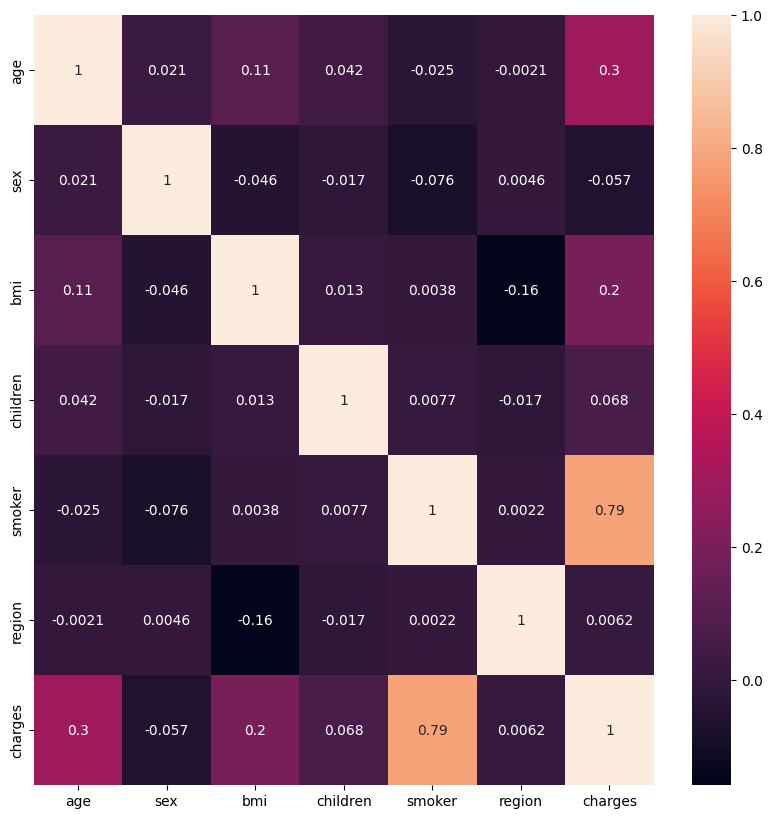

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# correlation matrix
correlation_matrix=data.corr()
print('Correlation Matrix:\n', correlation_matrix)

fig=plt.figure(figsize=(10,10))
ax=sns.heatmap(data=correlation_matrix, annot=True)
plt.show()


<Figure size 1000x1000 with 0 Axes>

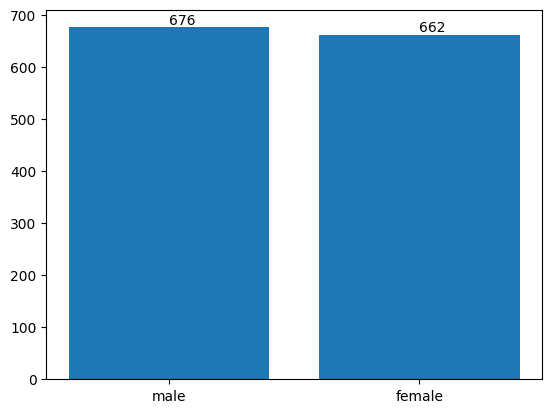

In [ ]:
# 2.  Bar plot for sex
count= data['sex'].value_counts()
fig=plt.figure(figsize=(10,10))

figure, axis=plt.subplots()
axis.bar(('male', 'female'),count)
for i, n in enumerate(count):
        plt.annotate(str(n), xy=(i, n), va='bottom')

<Axes: xlabel='smoker', ylabel='charges'>

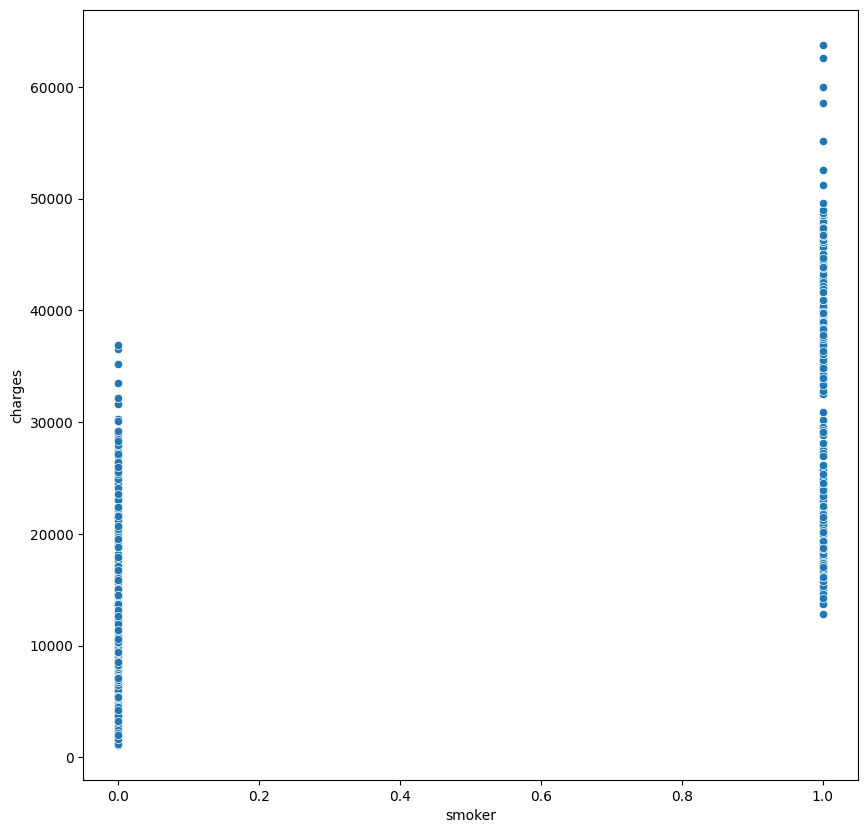

In [ ]:
# 3. Scatter plot of smoker to charge
fig=plt.figure(figsize=(10,10))
sns.scatterplot(data=data, x='smoker', y='charges')


southwest: 0 southeast :1  northwest:2 northeast :3


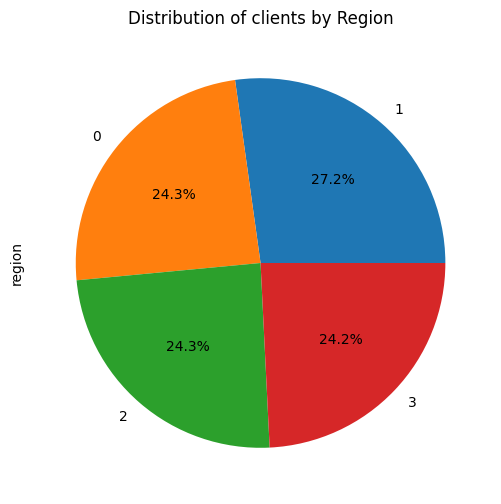

In [ ]:
# 4 pie chart
plt.figure(figsize=(6, 6))
data['region'].value_counts().plot(kind='pie', autopct='%1.1f%%' )
plt.title('Distribution of clients by Region')

print("southwest: 0"
     " southeast :1 "
     " northwest:2"
      " northeast :3")


<Axes: xlabel='bmi', ylabel='Count'>

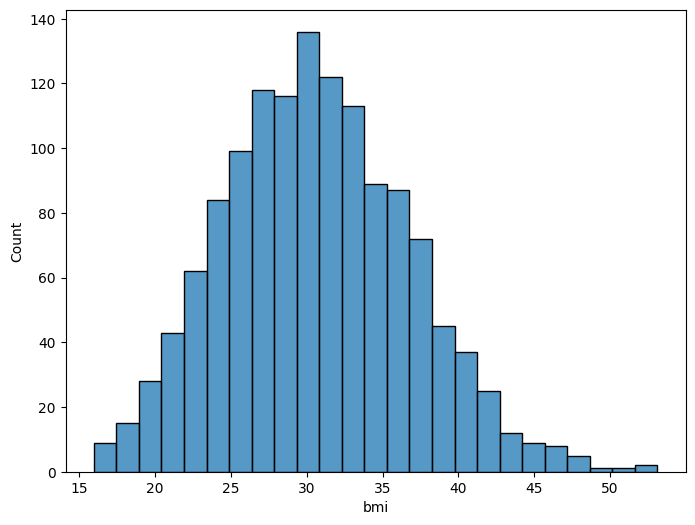

In [ ]:
# 5 histogram of bmi
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='bmi')

In [ ]:
# third function Unique values
print("Number of Unique values:")
print("Column Name      No. of Unique vlaues")
for column in data.columns:
    print(f"{column:<18}{ data[column].nunique()}")

Number of Unique values:
Column Name      No. of Unique vlaues
age               47
sex               2
bmi               548
children          6
smoker            2
region            4
charges           1337


In [ ]:
# Fifth funtion DataFrame.corr()
correlation=data.corr(method='pearson', min_periods=1, numeric_only=True)
print(correlation)

               age       sex       bmi  children    smoker    region   charges
age       1.000000  0.020856  0.109272  0.042469 -0.025019 -0.002127  0.299008
sex       0.020856  1.000000 -0.046371 -0.017163 -0.076185  0.004588 -0.057292
bmi       0.109272 -0.046371  1.000000  0.012759  0.003750 -0.157566  0.198341
children  0.042469 -0.017163  0.012759  1.000000  0.007673 -0.016569  0.067998
smoker   -0.025019 -0.076185  0.003750  0.007673  1.000000  0.002181  0.787251
region   -0.002127  0.004588 -0.157566 -0.016569  0.002181  1.000000  0.006208
charges   0.299008 -0.057292  0.198341  0.067998  0.787251  0.006208  1.000000


In [ ]:
#sum of the missing entries
sum1=data.isnull().sum(axis=0)
print(sum1)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
def normalize(features):
    for feature in features:
        feature_values = data[feature]
        min_val = min(feature_values)
        max_val = max(feature_values)
        data[feature] = (data[feature] - min_val) / (max_val - min_val)
    return None
normalize(['bmi'])
normalize(['age'])

Scale Uniformity: It ensures that different features contribute equally to the result by bringing all values into a similar scale, typically within a range of 0 to 1.

Improved Algorithm Performance: Many algorithms, especially those using distance measures (like K-Nearest Neighbors) or gradient descent (like Neural Networks), perform better when the data is normalized.

Faster Convergence: Normalization helps in speeding up the learning algorithm by helping to reach convergence faster in optimization algorithms.

Reduces Skewness: It can help reduce skewness in certain features, making the data more "model-friendly."

Prevents Dominance: Prevents features with larger ranges from dominating how a model learns, ensuring that each feature contributes appropriately.

Stability and Numerical Precision: Improves numerical stability and reduces the chances of encountering problems related to numerical precision.



In [ ]:
data.head(4)

,age,sex,bmi,children,smoker,region,charges
0,0.021739,1,0.321227,0,1,0,16884.92400
1,0.000000,0,0.479150,1,0,1,1725.55230
2,0.217391,0,0.458434,3,0,1,4449.46200
3,0.326087,0,0.181464,0,0,2,21984.47061


<Axes: xlabel='charges', ylabel='Count'>

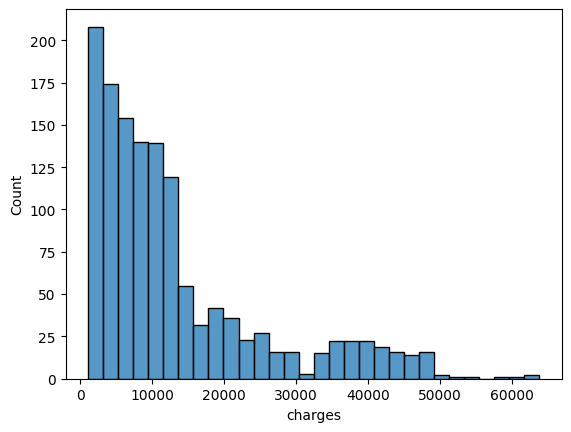

In [ ]:
sns.histplot(data['charges'])

## Part III Train and test Model

In [ ]:
# Linear Regression,
#-------------------------
import numpy as np
X = data.drop(['charges'], axis=1).values
Y = data['charges'].values

# Adding a column of ones to the features to account for the bias term
one_column = np.ones((X.shape[0], 1))
X = np.concatenate((one_column, X), axis=1)

# Splitting the dataset into training and testing sets
X_train = X[:int(0.8 * len(X))]
Y_train = Y[:int(0.8 * len(Y))]
X_test = X[int(0.8 * len(X)):]
Y_test = Y[int(0.8 * len(Y)):]

# Define the functions for the linear regression model
def fit(X_train, Y_train):
    X_Transpose = X_train.T
    X_Transpose_X_inv = np.linalg.inv(np.dot(X_Transpose, X_train))
    XT_X_inv_XT = np.dot(X_Transpose_X_inv, X_Transpose)
    w = np.dot(XT_X_inv_XT, Y_train)
    return w

def predict(w, X_test):
    return np.dot(X_test, w)

# Training the model
W = fit(X_train, Y_train)

# Making predictions on the test set
predictions = predict(W, X_test)

# Function to calculate RMSE
def rmse(Y_test, predictions):
    return np.sqrt(np.mean((Y_test - predictions) ** 2))

# Calculating RMSE for the predictions
RMSE = rmse(Y_test, predictions)

# Display the weights and RMSE
print("Weights: ", W)
print("RMSE:", RMSE)

# Function to take in user inputs and output the predicted charges
def input_to_prediction(age, sex, bmi, children, smoker, region, W):
    # Convert inputs to float and construct the input array in the correct format, including the bias term
    input_array = np.array([[1, age, sex, bmi, children, smoker, region]], dtype=float)
    prediction = predict(W, input_array)
    return prediction[0]  # Return the first (and only) element as the prediction

# Example usage with an input:
# Input new data points as parameters
age = 18
sex = 0  #  0 is male, 1 is female
bmi = 33
children = 1
smoker = 0  # 1 is smoker, 0 is non-smoker
region = 1  # 'southwest'=0 'southeast'=1 'northwest'=2 'northeast'=3

# Get the predicted charges
predicted_charges = input_to_prediction(age, sex, bmi, children, smoker, region, W)
print("Predicted Charges:", predicted_charges)


Weights:  [-3339.16945316 11956.12862023   246.70965668 12433.6700108
   441.81651302 23631.78924739   437.18170076]
RMSE: 6102.410956910755
Predicted Charges: 623061.2542809731


### Data Preparation:

The features (X) and target variable (Y) are taken from the dataframe.
A column of ones is added to X to include the bias term in the model.

### Training the Model (fit function):
It calculates the optimal weights (w) using the normal equation method. This involves matrix operations like transpose, multiplication, and inversion to find a closed-form solution for weights that minimize the error between predicted and actual values.

### Making Predictions (predict function):
The trained weights are used to make predictions on new data. This is done by multiplying the features (X_test) with the weights.

### Model Evaluation:
Root Mean Square Error (RMSE) is calculated to evaluate the model's performance. It measures the average magnitude of errors between the predicted and actual values.

### User Input Prediction (input_to_prediction function):
This function allows predicting charges for a new user input by applying the trained weights to the input features.

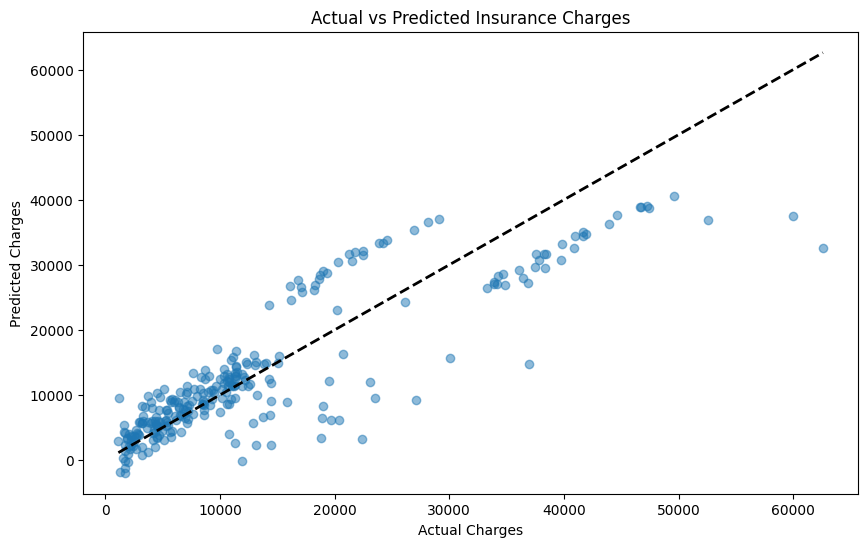

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # Reference line
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Insurance Charges')
plt.show()


In [ ]:
# ridge regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
data = pd.read_csv('/content/insurance.csv')

# Separate features and target variable
X = data.drop('charges', axis=1)
Y = data['charges']

# Define which columns should be encoded vs scaled
columns_to_encode = ['sex', 'smoker', 'region']
columns_to_scale  = ['age', 'bmi', 'children']

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, columns_to_scale),
        ('cat', categorical_transformer, columns_to_encode)
    ])

# Create and fit the Ridge regression model within a pipeline
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', Ridge(alpha=1.0))])

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the model
ridge_pipeline.fit(X_train, Y_train)

# Evaluate the model
predictions = ridge_pipeline.predict(X_test)
ridge_RMSE = np.sqrt(mean_squared_error(Y_test, predictions))

# Output the RMSE
print("Ridge Regression RMSE:", ridge_RMSE)

# Predict function using the pipeline
def predict_charges(age, sex, bmi, children, smoker, region, pipeline):
    input_data = pd.DataFrame([{
        'age': age,
        'sex': sex,
        'bmi': bmi,
        'children': children,
        'smoker': smoker,
        'region': region
    }])
    prediction = pipeline.predict(input_data)
    return prediction[0]

# Example usage with an input
predicted_charges = predict_charges(18, 'male', 33, 0, 'no', 'southeast', ridge_pipeline)
print("Predicted Charges:", predicted_charges)

Ridge Regression RMSE: 5798.298795415479
Predicted Charges: 3167.7368951130593


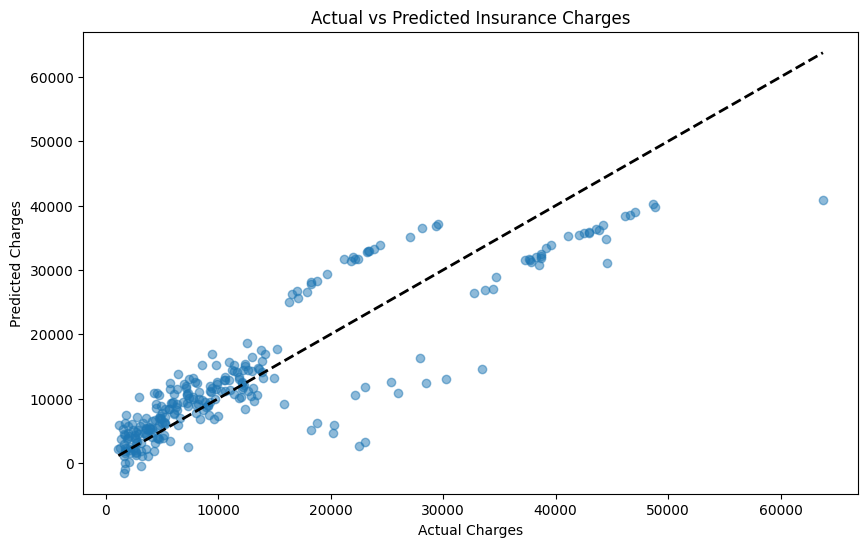

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # Reference line
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Insurance Charges')
plt.show()


##Ridge Regression

A linear regression model that adds L2 regularization to prevent overfitting and improve generalization. Shrinks coefficients to reduce model complexity.


##Model Training

* Split data into train and test sets
* Standardize numerical features like BMI, age
* One-hot encode categorical features like gender
* Fit ridge regression model on training set
* Tune regularization hyperparameter via cross-validation


##Model Evaluation

* Evaluate model on test set using RMSE
* RMSE measures deviation of predictions from true charges
* Lower RMSE indicates better generalization performance
* Compare to baseline model like linear regression without regularization
* Monitor model performance across random train/test splits

##Making Predictions

* Accept new patient data as input
* Preprocess inputs per pipeline (standardization, encoding)
* Pass inputs through trained ridge regression model
* Model generates predicted healthcare charges as output
* Can make predictions for new patients to estimate charges

1/1 [==============================] - 0s 61ms/step
Predicted Charges: 8758.922


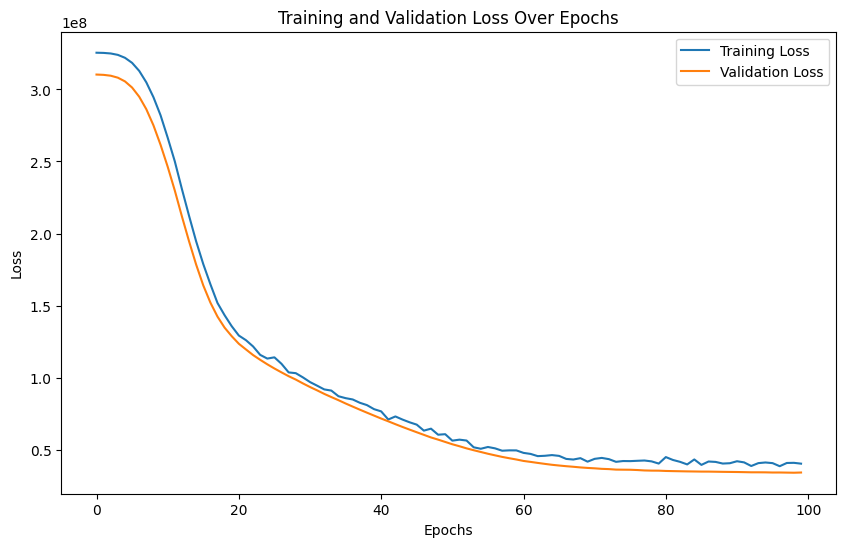

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
data = pd.read_csv('/content/insurance.csv')  # Update the path to your dataset

# Separate features and target variable
X = data.drop('charges', axis=1)
Y = data['charges']

# Define which columns should be encoded vs scaled
columns_to_encode = ['sex', 'smoker', 'region']
columns_to_scale  = ['age', 'bmi', 'children']

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, columns_to_scale),
        ('cat', categorical_transformer, columns_to_encode)
    ])

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42)

# Neural network architecture with Dropout and L2 Regularization
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model and save the history
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping], verbose=0)

# Function to make predictions using the trained model
def predict_charges(input_data, preprocessor, model):
    # Preprocess the input data
    input_processed = preprocessor.transform(pd.DataFrame([input_data]))

    # Make prediction
    prediction = model.predict(input_processed)
    return prediction[0][0]

# Example input data
example_input = {
    'age': 50,
    'sex': 'male',
    'bmi': 26.2,
    'children': 0,
    'smoker': 'no',
    'region': 'southeast'
}

# Predict charges
predicted_charges = predict_charges(example_input, preprocessor, model)
print("Predicted Charges:", predicted_charges)

# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


##Neural Network Model

* Use a sequential model with dense layers
* Include regularization via L2 and dropout to prevent overfitting
* Rectified Linear Unit (ReLU) activation functions

##Model Compilation

* Use Adam optimizer for efficient training
* Mean squared error loss function for regression task

##Model Training

* Train on preprocessed input data
* Use validation split to monitor performance
* Early stopping to prevent overfitting

##Model Evaluation

* Plot training and validation loss over epochs
* Assess if overfitting or underfitting is occurring
* Lower validation loss indicates better generalization

##Making Predictions

* Pass new patient data through trained model
* Preprocess inputs according to earlier pipeline
* Model outputs predicted healthcare charges

# References

In [ ]:
#https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/

In [ ]:
#https://docs.python.org/3.11/

In [ ]:
#https://numpy.org/doc/1.24/user/absolute_beginners.html

In [ ]:
#https://pandas.pydata.org/docs/getting_started/index.html#getting-started

In [ ]:
#https://matplotlib.org/stable/index.html

In [ ]:
# FIND OUT WHAT THE CHARGES MEANS